<a href="https://colab.research.google.com/github/Fatima-Usf/Analyzing-Youtube-trending_tags-and-views/blob/main/Youtube_trendings_tags_%26_views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re #for regular expression 
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 

# Loadings video

In [5]:
my_videos = pd.read_csv("USvideos.csv", error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [6]:
my_videos.head(10)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
5,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,34507,544,3040,https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg,13.09
6,8wNr-NQImFg,"The Check In: HUD, Ben Carson and Hurricanes",Late Night with Seth Meyers,23,Late night|Seth Meyers|check in|hud|Ben Carson...,666169,9985,297,1071,https://i.ytimg.com/vi/8wNr-NQImFg/default.jpg,13.09
7,_HTXMhKWqnA,iPhone X Impressions & Hands On!,Marques Brownlee,28,iPhone X|iphone x|iphone 10|iPhone X impressio...,1728614,74062,2180,15297,https://i.ytimg.com/vi/_HTXMhKWqnA/default.jpg,13.09
8,_ANP3HR1jsM,ATTACKED BY A POLICE DOG!!,RomanAtwoodVlogs,22,Roman Atwood|Roman|Atwood|roman atwood vlogs|f...,1338533,69687,678,5643,https://i.ytimg.com/vi/_ANP3HR1jsM/default.jpg,13.09
9,zgLtEob6X-Q,Honest Trailers - The Mummy (2017),Screen Junkies,1,screenjunkies|screen junkies|screenjunkies new...,1056891,29943,878,4046,https://i.ytimg.com/vi/zgLtEob6X-Q/default.jpg,13.09


# Preprocessing 

In [7]:
tags = ' '.join(my_videos['tags']) 

Removing noise



1.   Regular expression to clean tags



In [8]:
tags=re.sub('[^a-zA-Z]',' ', tags) #delete whatever I have apart a-z A-Z

2.   RE to Remove extra space




In [9]:
tags = re.sub(' +',' ',tags) #removing extra space

# wordCloud

In [10]:
wordcloud = WordCloud(width=1200, height= 800,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 1199.5, 799.5, -0.5)

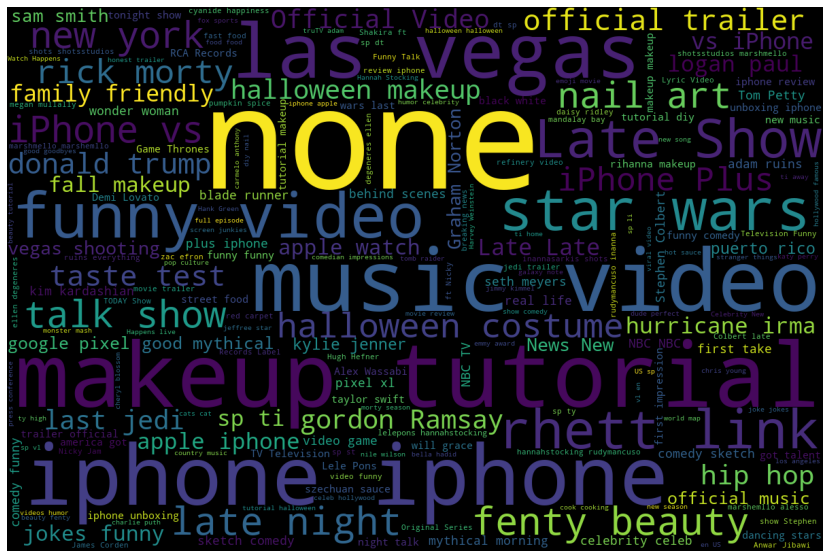

In [11]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

# Analyzing Youtube views and Likes



Text(0.5, 1.0, 'Regression plot of views and likes')

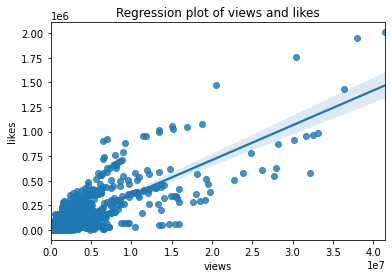

In [12]:
sns.regplot(data=my_videos, x='views', y='likes') #ploting a regression of views and likes
plt.title("Regression plot of views and likes")

Text(0.5, 1.0, 'Regression plot of Views and Dislikes')

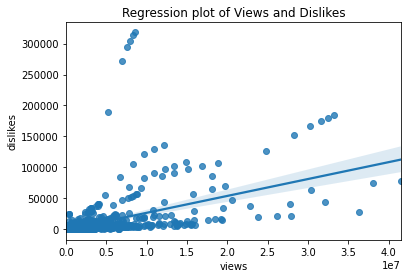

In [13]:
sns.regplot(data=my_videos, x='views', y='dislikes') #Views and dislikes
plt.title("Regression plot of Views and Dislikes")

# Correlation matrix

In [14]:
#finding how views, likes and dislikes are co-related 

In [15]:
correlation_videos = my_videos[['views','likes','dislikes']]

In [16]:
correlation_videos.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


In [ ]:
sns.heatmap(correlation_videos.corr())